In [1]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

from TDLMCpipeline.SimuModelFlexibility.structure import MockLens

In [2]:
def one_arcsec_bar(ax, x_left, y_low, pix_size, text='1"', text_offset=4, color='white', linewidth=2, fontsize=12):
    bar_length = 1. / pix_size
    ax.plot([x_left, x_left+bar_length], [y_low, y_low], color=color, linewidth=linewidth)
    ax.text(x_left+bar_length/2., y_low+text_offset, text, horizontalalignment='center', verticalalignment='bottom',
            fontsize=fontsize, color=color)

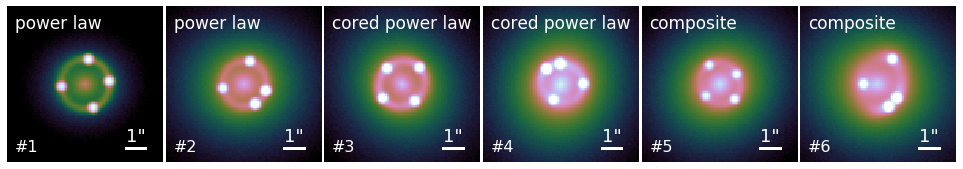

In [3]:
seed_list = range(211, 217)
label_list = ["power law"]*2 + ["cored power law"]*2 + ["composite"]*2
cmap = 'cubehelix'
pix_size = 0.08

# first loop to get min, max for color scaling
log_image_list = []
vmin, vmax = 1e10, -1e10
for seed in seed_list:
    lens = MockLens(seed)
    with pyfits.open(lens.image_path) as f:
        image = f[0].data
    log_image = np.log10(image)
    log_image_list.append(log_image)
    if log_image.min() < vmin:
        vmin = log_image.min()
    if log_image.max() > vmax:
        vmax = log_image.max()
        
# or set them manually here
vmin = -1
vmax = 1.8

fig, axes = plt.subplots(1, len(seed_list), figsize=(17, 3))
for s, seed in enumerate(seed_list):
    ax = axes[s]
    ax.axis('off')
    log_image = log_image_list[s]
    ax.imshow(log_image, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
    ax.text(0.05, 0.05, "#{}".format(s+1), horizontalalignment='left', verticalalignment='bottom',
            transform=ax.transAxes, fontsize=16, color='white')
    ax.text(0.05, 0.95, label_list[s], horizontalalignment='left', verticalalignment='top',
            transform=ax.transAxes, fontsize=17, color='white')
    one_arcsec_bar(ax, 75, 8, pix_size, text_offset=2, fontsize=18, linewidth=3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=None)
plt.show()
fig.savefig("mock_lenses.pdf", bbox_inches='tight')